In [1]:
# Tombliboos' homework
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import numpy
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pickle
import pandas

import argparse

In [2]:



class Train(object):
  
  def __init__(self, train_numpy):
    
    # Figure 2 
    # initialize GRU model
    self.GRU_model = self.create_model()
    
    # initialize train numpy
    self.train_numpy = train_numpy
    
    # Figure 1
    # plot original image
    self.plot_image(self.train_numpy)
    
    # remove abnormal data
    self.train = self.initial_train_numpy()
    self.num = len(self.train)
    
    # reshape train_numpy
    self.train = self.train.reshape(-1, 1)
    self.max = numpy.max(self.train, axis=0)
    self.min = numpy.min(self.train, axis=0)
    
    # Data 1
    # normalize data
    self.normalized_train = self.normalization()
    print(self.normalized_train[:,0])  # testing
    
    # Data 2
    # create dataset
    self.num_train = len(self.train_numpy) - 100 - 10 + 1
    self.new_X_train,self.new_Y_train = self.create_dataset()

    # Figure 4
    # train and plot loss
    self.GRU_model.fit(self.new_X_train[0:9000], self.new_Y_train[0:9000], epochs=100, batch_size=128)
    self.plot_image(self.GRU_model.history.history['loss'], 'Model Loss', 'Epoch', 'Loss', "log")
    
    # Figure 5
    # evaluation and plot train dataset
    self.outputs_train = self.GRU_model(self.new_X_train[0:9000])
    self.yy_train = self.new_Y_train[0:9000]
    self.outputs_train =numpy.array(self.outputs_train)
    self.plot_two_image(numpy.arange(90000), self.outputs_train.reshape(-1), '预测值', numpy.arange(90000), self.yy_train.reshape(-1), '真实值')
    
    # Figure 6
    # evaluation and plot prediction dataset
    self.outputs_prediction = self.GRU_model(self.new_X_train[9000:9970])
    self.yy_prediction=self.new_Y_train[9000:9970]
    self.outputs_prediction=numpy.array(self.outputs_prediction)
    self.plot_two_image(numpy.arange(9700), self.outputs_prediction.reshape(-1), '预测值', numpy.arange(9700), self.yy_prediction.reshape(-1), '真实值')
    
    # Figure 7
    # Prediction
    self.Y_prediction = []
    self.train2 = self.train.reshape(-1)
    for i in range(144):
      self.X_prediction=self.train2[-100:].copy()
      self.X_prediction=self.X_prediction.reshape(1,-1,1)
      self.outputs = self.GRU_model(self.X_prediction)
      self.outputs=numpy.array(self.outputs).reshape(-1)
      self.train2=numpy.concatenate((self.train2, self.outputs), axis=0)
      self.Y_prediction=numpy.concatenate((self.Y_prediction, self.outputs), axis=0)
    print(self.Y_prediction)
    
    # revover from normalization
    self.Y_2 = self.Y_prediction * (self.max - self.min) + self.min
    print(self.Y_2)
    
    # plot prediction
    self.plot_image(self.Y_2, '磁场数据1天预测', '时间/t', '磁场强度/Hn')
  
  def create_model(self):
    model = Sequential()
    model.add(GRU(units=100, activation='relu', input_shape=(100,1)))
    model.add(Dense(units=10))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    
    return model
  
  def plot_image(self, numpy, title=None, xlabel=None, ylabel=None, yscale=None, Legend=False):
    plt.plot(numpy)
    if title != None:
      plt.title(title)
    if xlabel != None:
      plt.xlabel(xlabel)
    if ylabel != None:
      plt.ylabel(ylabel)
    if yscale != None:
      plt.yscale(yscale)
    if Legend == True:
      plt.legend()
      
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    plt.show()
 
  def initial_train_numpy(self, threshold=3):
    # Remove outliers
    mean = numpy.mean(self.train_numpy)
    std = numpy.std(self.train_numpy)
    score = [(x - mean) / std for x in self.train_numpy]  
    filtered_data = [x if abs(z) < threshold else 0 for x,z in zip(self.train_numpy, score)]
    
    return numpy.interp(numpy.arange(len(filtered_data)), numpy.flatnonzero(filtered_data), numpy.array(filtered_data)[numpy.flatnonzero(filtered_data)])
    
  def normalization(self):
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    return min_max_scaler.fit_transform(self.train)
  
  def create_dataset(self):
    new_X_train = numpy.zeros((self.num_train, 100, 1))
    new_Y_train = numpy.zeros((self.num_train, 10))
    for i in range(self.num_train):
      new_X_train[i] = self.train[i:i+100]

    for i in range(self.num_train):
      new_Y_train[i] = self.train[100+i:100+i+10, 0 ]
    
    return new_X_train, new_Y_train
  
  def plot_two_image(self, X1, Y1, label1, X2, Y2 ,label2):
    plt.plot(X1,Y1,label=label1)
    plt.plot(X2,Y2,label=label2) 
    plt.legend()
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    
    plt.show()
    




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               30900     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 31,910
Trainable params: 31,910
Non-trainable params: 0
_________________________________________________________________


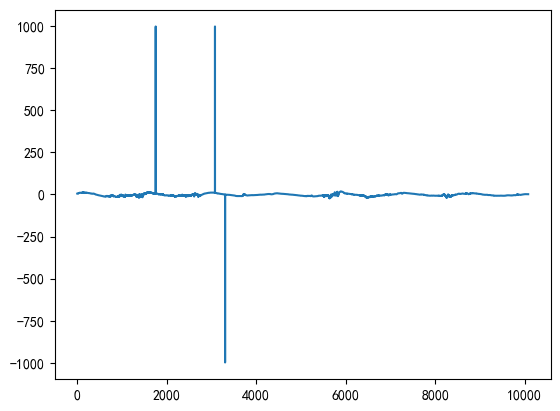

[0.67982109 0.68029695 0.68478889 ... 0.59224281 0.59179589 0.59149195]
Epoch 1/100
71/71 [==============================] - 3s 39ms/step - loss: 17.7898
Epoch 2/100
71/71 [==============================] - 3s 39ms/step - loss: 3.0866
Epoch 3/100
71/71 [==============================] - 3s 39ms/step - loss: 2.9187
Epoch 4/100
71/71 [==============================] - 3s 39ms/step - loss: 2.8278
Epoch 5/100
71/71 [==============================] - 3s 39ms/step - loss: 2.7503
Epoch 6/100
71/71 [==============================] - 3s 39ms/step - loss: 2.6701
Epoch 7/100
71/71 [==============================] - 3s 39ms/step - loss: 2.6433
Epoch 8/100
71/71 [==============================] - 3s 39ms/step - loss: 2.5959
Epoch 9/100
71/71 [==============================] - 3s 39ms/step - loss: 2.5925
Epoch 10/100
71/71 [==============================] - 3s 40ms/step - loss: 2.5314
Epoch 11/100
71/71 [==============================] - 3s 38ms/step - loss: 2.4858
Epoch 12/100
71/71 [==============

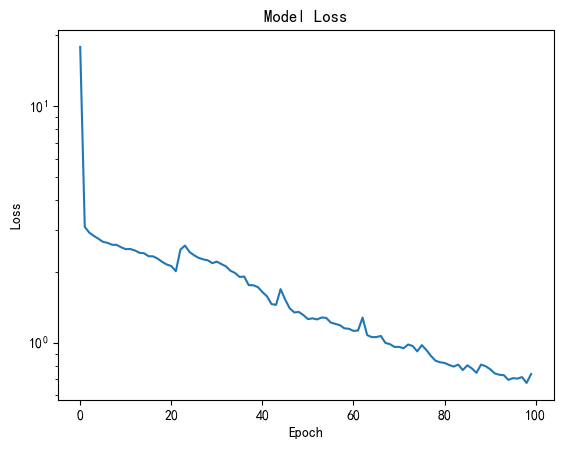

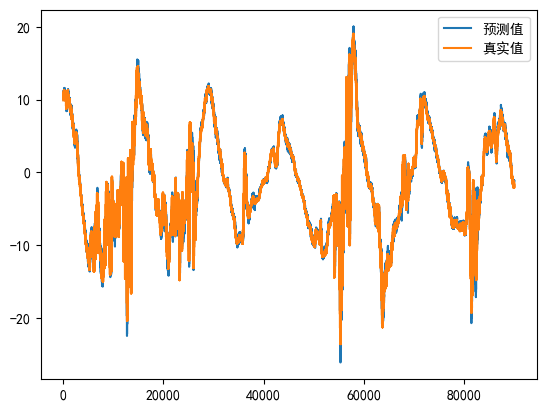

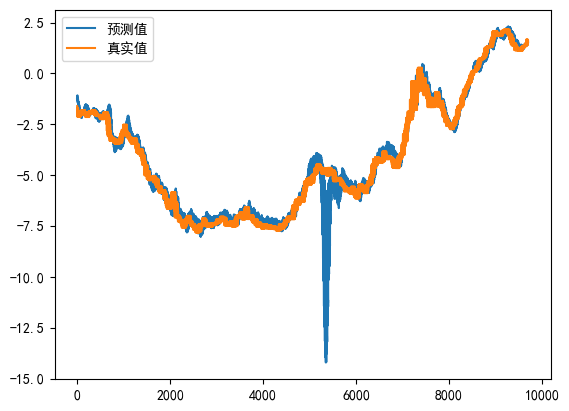

[ 1.74240196  1.80219543  1.7527076  ... -1.17776251 -1.21440291
 -1.18250442]
[ 50.71797532  53.26899191  51.15765319 ... -73.86732976 -75.4305486
 -74.06963753]


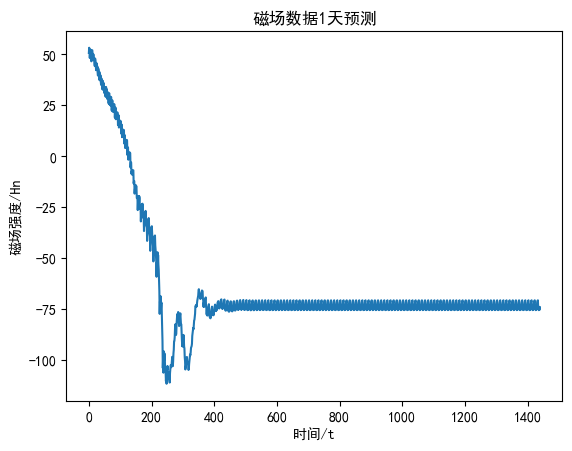

In [5]:
def main():
  # read excel file
  data = pandas.read_excel("空间天气预报练习与作业\磁场数据7天.xls")
  train_numpy_origin = data["Hn"] # 调取Hn数据
  train_numpy = numpy.array(train_numpy_origin) # 转成数组
  train = Train(train_numpy)


if __name__ == '__main__':
  main()